<font size=6> <b> Advanced Python : week #7</b> </font>
<div class="alert alert-block alert-success">
   Advanced Python features <br>
    <ol>
        <li> PEP </li>
        <li> type hint </li>
        <li> dir, inspect </li>
        <li> code formatting </li>
        <li> debugging </li>
    </ol>
</div>

<p style="text-align:right;"> sumyeon@gmail.com </p>

#### - import frequently used modules

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# PEP : Python Enhancement Proposals

A PEP is a design document providing information to the Python community, <br> 
or describing a new feature for Python or its processes or environment. <br>
The PEP should provide a concise technical specification of the feature and a rationale for the feature.

## PEP examples

### PEP 0 : Index of Python Enhancemnet Proposals
> it contains the index of all Python Enhancement Proposals, known as PEPs. PEP numbers are assigned by the PEP editors, and once assigned are never changed. <br>

> https://www.python.org/dev/peps/pep-0000/

### PEP 8 style guides
> it gives coding conventions for the Python code comprising the standard library in the main Python distribution.
<br>

> https://www.python.org/dev/peps/pep-0008/

### PEP 20 : The Zen of Python
> The Zen of Python is a collection of 19 "guiding principles" for writing computer programs that influence the design of the Python programming language

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Type hints (PEP 484)
> type annotation convention for static analysis


> <b> Pros </b> : imporve readability, catch certation errors, help document your code, imporve IDEs and linters <br>
> <b> Cons </b> : take developer time and effort, introduce a slight penalty in start-up time

### How-to

> Variables/Built-in types

In [3]:
from typing import Dict, List, Optional, Set, Tuple

# For simple built-in types, just use the name of the type
x: int = 1
x: float = 1.0
x: bool = True
x: str = "test"
x: bytes = b"test"

x: List[int] = [1]
x: Set[int] = {6, 7}
x: Dict[str, float] = {"field": 2.0}
x: Tuple[int, str, float] = (3, "yes", 7.5)  # tuple of fixed size
x: Tuple[int, ...] = (1, 2, 3)  # tuple of variable size
x: Optional[str] = lambda x: x * X  # values that could be None

> Functions

In [4]:
from typing import Callable, Iterator, Union, Optional, List


def f(num1: int, my_float: float = 3.5) -> float:
    return num1 + my_float


x: Callable[[int, float], float] = f


def g(n: int) -> Iterator[int]:
    i = 0
    while i < n:
        yield i
        i += 1

> Classes

In [5]:
class MyClass:

    attr: int
    charge_percent: int = 100

    def __init__(self) -> None:
        ...

    def my_method(self, num: int, str1: str) -> str:
        return num * str1

### Note: type hint is just a HINT!!

In [6]:
def add_two_int(x: int, y: int) -> int:
    return x + y

In [7]:
add_two_int(3.7, 0.99)

4.69

### Type checking tools : pydantic example

!pip install -U pydantic

In [8]:
from datetime import datetime
from typing import List, Optional
from dataclasses import dataclass


@dataclass
class User:
    id: int
    name: str
    signup_ts: Optional[datetime] = None
    friends: List[int] = None

In [9]:
User(id='123', name='smkim', signup_ts = '2017-06-01 12:22', friends = [1, '2', b'3'])

User(id='123', name='smkim', signup_ts='2017-06-01 12:22', friends=[1, '2', b'3'])

In [10]:
User(signup_ts='broken', friends=[1, 2, 'not number'])

TypeError: __init__() missing 2 required positional arguments: 'id' and 'name'

In [11]:
User(id='123', name='smkim', signup_ts='broken', friends=[1, 2, 'not number'])

User(id='123', name='smkim', signup_ts='broken', friends=[1, 2, 'not number'])

In [12]:
from pydantic import BaseModel

class PydanticUser(BaseModel):
    id: int
    name = 'John Doe'
    signup_ts: Optional[datetime] = None
    friends: List[int] = None

In [13]:
PydanticUser(id='123', name='smkim', signup_ts = '2017-06-01 12:22', friends = [1, '2', b'3'])

PydanticUser(id=123, signup_ts=datetime.datetime(2017, 6, 1, 12, 22), friends=[1, 2, 3], name='smkim')

In [14]:
PydanticUser(signup_ts='broken', friends=[1, 2, 'not number'])

ValidationError: 3 validation errors for PydanticUser
id
  field required (type=value_error.missing)
signup_ts
  invalid datetime format (type=value_error.datetime)
friends -> 2
  value is not a valid integer (type=type_error.integer)

# dir 
> Without arguments, return the list of names in the current local scope. <br>
> With an argument, attempt to return a list of valid attributes for that object.

In [15]:
pprint

Pretty printing has been turned OFF


In [16]:
dir()

['ARIMA', 'BaseModel', 'Callable', 'CountVectorizer', 'Dict', 'ElasticNet', 'ElasticNetCV', 'GradientBoostingClassifier', 'GradientBoostingRegressor', 'GridSearchCV', 'Image', 'In', 'Iterator', 'KFold', 'KMeans', 'LabelEncoder', 'Lasso', 'LassoCV', 'LazyImport', 'LinearRegression', 'List', 'LogisticRegression', 'MinMaxScaler', 'MyClass', 'OneHotEncoder', 'Optional', 'Out', 'PCA', 'Path', 'PolynomialFeatures', 'Prophet', 'PydanticUser', 'RandomForestClassifier', 'RandomForestRegressor', 'RandomizedSearchCV', 'Ridge', 'RidgeCV', 'RobustScaler', 'Set', 'SimpleImputer', 'SparkContext', 'StandardScaler', 'StratifiedKFold', 'TSNE', 'TfidfVectorizer', 'Tuple', 'Union', 'User', '_', '_11', '_13', '_7', '_9', '__', '___', '__annotations__', '__builtin__', '__builtins__', '__cached__', '__doc__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih'

In [17]:
dir('hello world')

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']

In [18]:
pprint

Pretty printing has been turned ON


# inspect

The inspect module provides several useful functions to help get information about live objects such as modules, classes, methods, functions, tracebacks, frame objects, and code objects.

In [19]:
import inspect

In [20]:
class anyclass:
    def any_func(self, x):
        return x*x*x

In [21]:
inspect.getmodule(anyclass.any_func)

<module '__main__'>

In [22]:
inspect.getsource(anyclass.any_func)

'    def any_func(self, x):\n        return x*x*x\n'

In [23]:
print(inspect.getsource(inspect.getsource))

def getsource(object):
    """Return the text of the source code for an object.

    The argument may be a module, class, method, function, traceback, frame,
    or code object.  The source code is returned as a single string.  An
    OSError is raised if the source code cannot be retrieved."""
    lines, lnum = getsourcelines(object)
    return ''.join(lines)



In [24]:
inspect.getmembers(anyclass)

[('__class__', type),
 ('__delattr__', <slot wrapper '__delattr__' of 'object' objects>),
 ('__dict__',
  mappingproxy({'__module__': '__main__',
                'any_func': <function __main__.anyclass.any_func(self, x)>,
                '__dict__': <attribute '__dict__' of 'anyclass' objects>,
                '__weakref__': <attribute '__weakref__' of 'anyclass' objects>,
                '__doc__': None})),
 ('__dir__', <method '__dir__' of 'object' objects>),
 ('__doc__', None),
 ('__eq__', <slot wrapper '__eq__' of 'object' objects>),
 ('__format__', <method '__format__' of 'object' objects>),
 ('__ge__', <slot wrapper '__ge__' of 'object' objects>),
 ('__getattribute__', <slot wrapper '__getattribute__' of 'object' objects>),
 ('__gt__', <slot wrapper '__gt__' of 'object' objects>),
 ('__hash__', <slot wrapper '__hash__' of 'object' objects>),
 ('__init__', <slot wrapper '__init__' of 'object' objects>),
 ('__init_subclass__', <function anyclass.__init_subclass__>),
 ('__le__', <sl

In [25]:
print(1)
print(2)
inspect.currentframe().f_lineno

1
2


3

# Code Formatting

### Pylint and Flake8

> Pylint is a tool that checks for errors in Python. It tries to enforce a coding standard and looks for code smells. It can also look for certain type errors, it can recommend suggestions about how particular blocks can be refactored, and can offer you details about the code’s complexity.

> Flake8 is a Python library that wraps PyFlakes, pycodestyle and Ned Batchelder’s McCabe script. It is a great toolkit for checking your code base against coding style (PEP8), programming errors like “library imported but unused”, “Undefined name” and code which is not indented.

### Jupyterlab Code Formatter
> https://jupyterlab-code-formatter.readthedocs.io/en/latest/installation.html <br>
> https://jupyterlab-code-formatter.readthedocs.io/en/latest/how-to-use.html#changing-formatter-parameter

# Debugging

In [26]:
def my_add(value_a, value_b):
    plus_a = value_a+1
    plus_b = value_b+1
    return plus_a+plus_b

def my_print(first, second):
    
    result = my_add(first,second)
    print(int(result))
    

In [27]:
my_print(10, '10')

TypeError: can only concatenate str (not "int") to str

In [28]:
%debug

UsageError: Line magic function `%` not found.


# Sorting Objects by Multiple Keys

In [29]:
people = [
    {"name": "John", "age": 64},
    {"name": "Janet", "age": 34},
    {"name": "Ed", "age": 24},
    {"name": "Sara", "age": 64},
    {"name": "John", "age": 32},
    {"name": "Jane", "age": 34},
    {"name": "John", "age": 99},
]

In [30]:
# SELECT * FROM people ORDER by name, age

import operator

people.sort(key=operator.itemgetter("age"))
people.sort(key=operator.itemgetter("name"))

In [33]:
people

[{'name': 'Ed', 'age': 24},
 {'name': 'Jane', 'age': 34},
 {'name': 'Janet', 'age': 34},
 {'name': 'John', 'age': 32},
 {'name': 'John', 'age': 64},
 {'name': 'John', 'age': 99},
 {'name': 'Sara', 'age': 64}]

# Pickling and Unpicklong
> a way of object serialization and deserialization

In [34]:
import pickle

people_serialized = pickle.dumps(people)

In [35]:
people_serialized

b'\x80\x03]q\x00(}q\x01(X\x04\x00\x00\x00nameq\x02X\x02\x00\x00\x00Edq\x03X\x03\x00\x00\x00ageq\x04K\x18u}q\x05(h\x02X\x04\x00\x00\x00Janeq\x06h\x04K"u}q\x07(h\x02X\x05\x00\x00\x00Janetq\x08h\x04K"u}q\t(h\x02X\x04\x00\x00\x00Johnq\nh\x04K u}q\x0b(h\x02h\nh\x04K@u}q\x0c(h\x02h\nh\x04Kcu}q\r(h\x02X\x04\x00\x00\x00Saraq\x0eh\x04K@ue.'

In [36]:
new_people = pickle.loads(people_serialized)

In [37]:
new_people == people

True

# Today's Tip

Why should we explicitly add every time "import" module statements? 

In [38]:
df = pd.DataFrame(data={'first' : [21,15,10], 'second' : [11, 12, 13]}, index=[0,1,2])

In [39]:
df

,first,second
0,21,11
1,15,12
2,10,13


<AxesSubplot:>

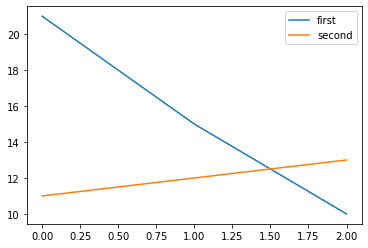

In [40]:
df.plot()

In [41]:
sns.plot(df)

<IPython.core.display.Javascript object>

AttributeError: module 'seaborn' has no attribute 'plot'

In [42]:
import pyforest

<IPython.core.display.Javascript object>

<AxesSubplot:>

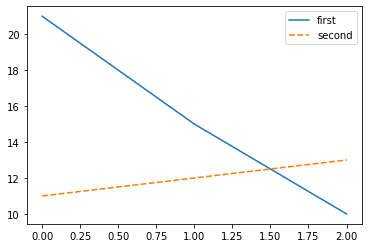

In [43]:
sns.lineplot(data=df)

## Practical Coding Techniques

** 32 Advanced Techniques for Better Python Code ** <br>
https://betterprogramming.pub/thirty-two-advanced-techniques-for-better-python-code-6717226eb611